# Logistic Regression

## Function

$$
h\theta(x) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}}
$$

Same as Linear Regression but with its output passed to the logisitc funcion:

$$
g(x) = \frac{1}{1 + e^{-x}}
$$

Taking it's derivative:

$$
\begin{aligned}
    \frac{d}{dx} g(x) & = \frac{d}{dx} \left[ \left( 1 + e^{-x} \right)^{-1} \right] \\
                      & = -(1 + e^{-x})^-2 \frac{d}{dx} \left[ 1 + e^{-x} \right] \\
                      & = -(1 + e^{-x})^{-2} e^{-x} \frac{d}{dx} \left[ -x \right] \\
                      & = (1 + e^{-x})^{-2} e^{-x} \\
                      & = \frac{1}{(1 + e^{-x})^2} e^{-x} \\
                      & = g(x)(1 - g(x)) \\
\end{aligned}
$$

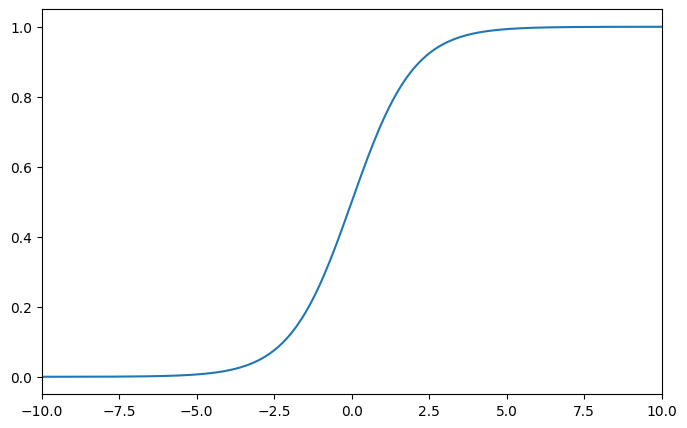

In [2]:
import numpy as np
import matplotlib.pyplot as plt

step = 0.10
x = np.arange(-10, 10 + step, step)
y = np.pow(1 + np.exp(-x), -1)

plt.figure(figsize=(8, 5))
plt.xlim(x.min(), x.max())
plt.plot(x, y);

Logisitic Regression is a classifier model, so the logistic function can be thought as the probability that the independent variable $x$ is of class 1.

$$
\begin{aligned}
p(x \text{ is of class } 1) & = g(x) \\
p(x \text{ is of class } 0) & = 1 - g(x) \\
\end{aligned}
$$

## Logistic Loss Function

$$
\mathit{Loss}(h_\theta(x), y) =
    \begin{cases}
        -\log(h_\theta(x)) &,  y = 1 \\
        -\log(1 - h_\theta(x)) &,  y = 0
    \end{cases}
$$

Because $y \in {0, 1}$, the function can be expressed without the cases in the following way:

$$
\mathit{Loss}(h_\theta(x), y) = -y\log(h_\theta(x)) - (1 - y)\log(1 - h_\theta(x))
$$

So when $y = 1$ the above expression becomes $-\log(h_\theta(x))$, and when $y = 0$ it becomes $-\log(1-h\theta(x))$.

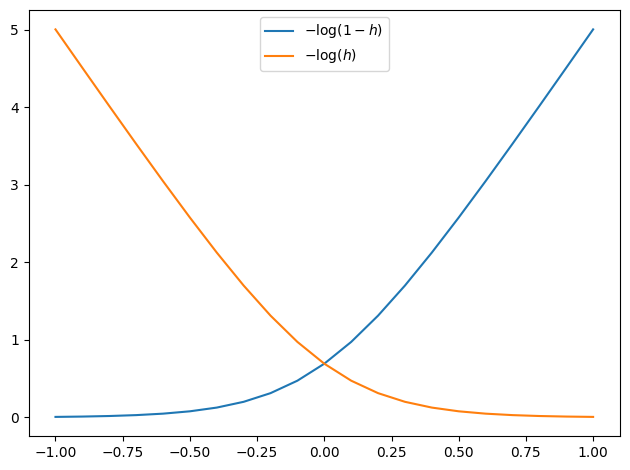

In [ ]:
b, w = 0, 5

def linear(x): return b + w * x
def logisitc(x): return np.pow(1 + np.exp(-x), -1)

x = np.arange(-1, 1.1, 0.1)
h = logisitc(linear(x))

y0 = -np.log(1 - h)
y1 = -np.log(h)

plt.plot(x, y0, label=r"$-\log(1 - h)$");
plt.plot(x, y1, label=r"$-\log(h)$");
plt.tight_layout()
plt.legend(loc="upper center");

Expressing the loss function with respect to the parameters because it's what we want to optimize ($x$ and $y$ are constants during training):

$$
J(\theta) = -\frac{1}{m} \sum\limits_{i=1}^{m} y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))
$$

Taking the gradient with respect to the whole parameter vector $\theta$:

$$
\begin{aligned}
    \nabla J(\theta) & = -\frac{1}{m} \nabla \left[ \sum\limits_{i=1}^{m} y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})) \right] \\
                     & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}\frac{1}{h_\theta(x^{(i)})} \nabla \left[ h_\theta(x^{(i)}) \right]
                            - (1 - y^{(i)}) \frac{1}{1 - h_\theta(x^{(i)})} \nabla \left[ h_\theta(x^{(i)}) \right]\right)
\end{aligned}
$$

From the previous derivation of $g(x)$ we know that:

$$
    \frac{d}{dx} g(x) = g(x)(1 - g(x)) \\
$$

since:

$$
h_\theta(x^{(i)}) = g(\theta^Tx^{(i)})
$$

its gradient w.r.t. $\theta$ is:
$$
\nabla h_\theta(x^{(i)}) = h_\theta(x^{(i)})(1 - h_\theta(x^{(i)}))x^{(i)}
$$

Therefore: 

$$
\begin{aligned}
    & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}\frac{x^{(i)}}{h_\theta(x^{(i)})} h_\theta(x^{(i)}) \left( 1 - h_\theta(x^{(i)})\right)
        - (1 - y^{(i)}) \frac{x^{(i)}}{1 - h_\theta(x^{(i)})} h_\theta(x^{(i)}) \left( 1 - h_\theta(x^{(i)}) \right) \right) \\
    & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}x^{(i)}\left( 1 - h_\theta(x^{(i)})\right)
        - (1 - y^{(i)})x^{(i)}h_\theta(x^{(i)}) \right) \\
    & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}x^{(i)} - y^{(i)}x^{(i)}h_\theta(x^{(i)})
        - x^{(i)}h_\theta(x^{(i)}) + y^{(i)}x^{(i)}h_\theta(x^{(i)}) \right) \\
    & = -\frac{1}{m} \left( \sum\limits_{i=1}^{m} y^{(i)}x^{(i)} - x^{(i)}h_\theta(x^{(i)}) \right) \\
    & = -\frac{1}{m} \sum\limits_{i=1}^{m} \left( y^{(i)} - h_\theta(x^{(i)}) \right) x^{(i)} \\
\end{aligned}
$$

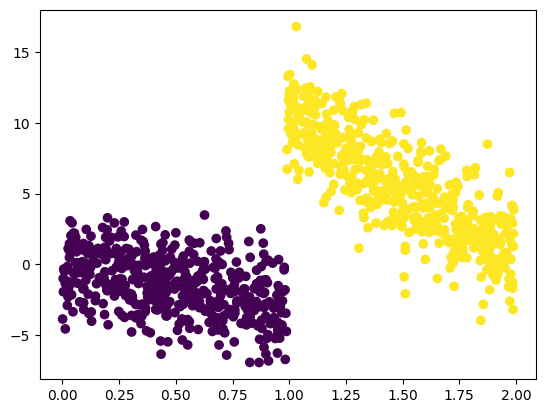

In [62]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(69)

n_samples = 1000
n_outputs = 1 # number of output vairables (y)
n_features = 2 # number of input vairables (x1, x2)

gn = n_samples // 2

g1x1 = np.random.rand(gn)
g1x2 = -3.0 * g1x1 + np.random.normal(loc=0.0, scale=2.0, size=gn)

g2x1 = np.random.rand(gn)
g2x2 = -10.0 * g2x1 + np.random.normal(loc=0.0, scale=2.0, size=gn)

g2x1 += np.abs(g1x1.min()) + np.abs(g1x1.max()) + 0.001
g2x2 += np.abs(g1x2.min()) + np.abs(g1x2.max()) + 0.001

x1, x2 = np.concatenate((g1x1, g2x1)), np.concatenate((g1x2, g2x2))
y = np.concatenate((np.zeros(gn), np.ones(gn)))

# optional: shuffle the order
p = np.random.permutation(n_samples)
x1, x2, y = x1[p], x2[p], y[p]

X = np.stack((x1, x2), axis=1)
y = y.reshape((n_samples, n_outputs))

plt.scatter(*X.T, c=y);

In [45]:
test_size = 0.33
mask = np.random.rand(n_samples) < test_size
X_train, y_train = X[~mask], y[~mask]
X_test, y_test = X[mask], y[mask]
print(f"train: {len(y_train)}; test: {len(y_test)}")

train: 690; test: 310


train loss: 0.0002
 test loss: 0.0001


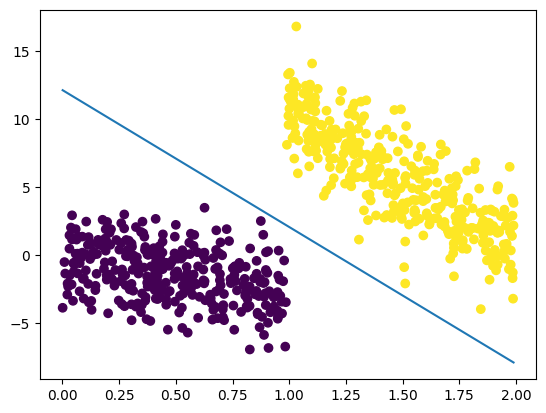

In [85]:
lr = 0.10 # learning rate
tol = 1e-7 # convergence tolerance (change this to allow for more/less error)

b = np.zeros(n_outputs)
w = np.zeros((n_features, n_outputs))

n_train = X_train.shape[0]

# iterate until convergence
loss, last_loss = float("inf"), 0.0
while abs(loss - last_loss) >= tol:

  # X_train.shape = (n_train, n_features)
  # y_train.shape = (n_train, n_outputs)
  #  y_pred.shape = (n_train, n_outputs)
  #     err.shape = (n_train, n_outputs)

  x = b + X_train @ w
  y_pred = np.pow(1 + np.exp(-x), -1) # h(x)
  err = y_train - y_pred  # y - h(x)

  last_loss = loss
  loss = np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred), axis=0) / -n_train

  # x_train.T @ err -> (n_features, n_train) @ (n_train, n_outputs) = (n_features, n_outputs)
  # the matmul x_train.T @ err aggregates along the n_train dimension (this is the summation of the gradient formula described above)

  grad_w = (X_train.T @ err) / -n_train # sum((y - h(x))x) / -m
  w -= lr * grad_w

  # the bias works the same way, but all of the x's are always 1's
  # a matmul between a vector with all ones and a matrix, in that order, is the sum of all the columns in the matrix
  grad_b = err.sum(axis=0) / -n_train # sum((y - h(x))x) / -m -> sum((y - h(x))1) / -m -> sum(y - h(x)) / -m
  b -= lr * grad_b

x = b + X_train @ w
y_pred = np.pow(1 + np.exp(-x), -1)
err = y_pred - y_train
loss = np.pow(err, 2).mean() / 2
print(f"train loss: {loss:6.4f}")

x = b + X_test @ w
y_pred = np.pow(1 + np.exp(-x), -1)
err = y_pred - y_test
loss = np.pow(err, 2).mean() / 2
print(f" test loss: {loss:6.4f}")

# b + w1*x1 + w2*x2 = 0
# x2 = -b/w2 -w1/w2*x2
w1, w2 = w[:, 0]
lb, lw = b / -w2, w1 / -w2
lx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), n_samples)
ly = lb + lw * lx
plt.scatter(*X_train.T, c=y_train);
plt.plot(lx, ly);